In [71]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/games_of_all_time.csv')
data.info()
model_data = data[['meta_score','user_score','platform','genre','type','rating']] 
model_data = model_data.dropna()
#model_data.info()
#model_data.head(5)
# exploding genre multiple values into indiviidual rows
from ast import literal_eval
model_data['genre']=model_data['genre'].apply(literal_eval)
#print(model_data['genre'].apply(type))
#model_data.head(5)
#model_data.explode('genre')
model_data = model_data.explode('genre', 'true')
# exploding platform multiple values into indiviidual rows
model_data['platform']=model_data['platform'].apply(literal_eval)
#print(model_data['platform'].apply(type))
model_data = model_data.explode('platform', 'true')
model_data.info()
model_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28052 entries, 0 to 28051
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  28052 non-null  float64
 1   user_score  28052 non-null  float64
 2   platform    28052 non-null  object 
 3   genre       28052

,meta_score,user_score,platform,genre,type,rating
0,99.0,91.0,nintendo-64,Action Adventure,singleplayer,E
1,99.0,91.0,nintendo-64,Fantasy,singleplayer,E
2,97.0,91.0,wii,Action,singleplayer,E
3,97.0,91.0,wii,Platformer,singleplayer,E
4,97.0,91.0,wii,3D,singleplayer,E
5,97.0,91.0,wii,Action,singleplayer,E
6,97.0,91.0,wii,Platformer,singleplayer,E
7,97.0,91.0,wii,3D,singleplayer,E
8,97.0,89.0,gamecube,Action,singleplayer,T
9,97.0,89.0,gamecube,Shooter,singleplayer,T


In [72]:
model_data['genre'].value_counts()

Action              2864
General             1885
Action Adventure    1333
Shooter             1096
Role-Playing        1019
                    ... 
Tank                   1
Videos                 1
Drag                   1
Text                   1
WWI                    1
Name: genre, Length: 166, dtype: int64

In [73]:
#should we remove the genre values which have less data ?
sub_model_data = model_data[model_data.groupby('genre').genre.transform('count')>100].copy()

In [74]:
sub_model_data.info()
sub_model_data['genre'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25205 entries, 0 to 28051
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  25205 non-null  float64
 1   user_score  25205 non-null  float64
 2   platform    25205 non-null  object 
 3   genre       25205 non-null  object 
 4   type        25205 non-null  object 
 5   rating      25205 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


Action               2864
General              1885
Action Adventure     1333
Shooter              1096
Role-Playing         1019
Sports                907
Arcade                902
Miscellaneous         808
First-Person          753
3D                    690
Strategy              658
Platformer            638
2D                    618
Racing                574
Traditional           567
Sci-Fi                555
Adventure             550
Modern                542
Fantasy               528
Driving               492
Sim                   468
Third-Person          464
Simulation            445
Action RPG            426
Automobile            335
Fighting              319
Team                  289
Beat-'Em-Up           278
Open-World            270
Real-Time             262
Puzzle                256
Historic              252
Turn-Based            246
Compilation           222
Individual            221
Japanese-Style        199
Survival              181
Tactical              177
Console-styl

In [75]:
sub_model_data['genre'].nunique()

53

In [76]:
sub_model_data['platform'].value_counts()

pc                  5453
xbox-360            2571
playstation-4       2546
playstation-2       2247
playstation-3       2209
switch              1863
xbox                1335
xbox-one            1325
ds                  1094
wii                  970
psp                  936
gamecube             785
game-boy-advance     604
3ds                  314
playstation-vita     274
playstation          235
wii-u                164
playstation-5        111
nintendo-64           88
xbox-series-x         47
dreamcast             29
stadia                 5
Name: platform, dtype: int64

In [77]:
#should we replace multiple similar platform values to a single value e.g ps1,ps2 as ps
sub_model_data['platform']=sub_model_data['platform'].replace(['playstation-4','playstation-3','playstation-2',
                                                               'playstation-vita','playstation-5'],'playstation')
sub_model_data['platform']=sub_model_data['platform'].replace(['xbox-360','xbox-one','xbox-series-x'],'xbox')
sub_model_data['platform']=sub_model_data['platform'].replace(['wii-u'],'wii')

In [78]:
sub_model_data['platform'].value_counts()

playstation         7622
pc                  5453
xbox                5278
switch              1863
wii                 1134
ds                  1094
psp                  936
gamecube             785
game-boy-advance     604
3ds                  314
nintendo-64           88
dreamcast             29
stadia                 5
Name: platform, dtype: int64

In [79]:
#hot encoding
encoded_sub_model_data= pd.get_dummies(sub_model_data, columns=['platform','genre','type','rating'],prefix=['platform','genre','type','rating'])

In [80]:
encoded_sub_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25205 entries, 0 to 28051
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   meta_score                 25205 non-null  float64
 1   user_score                 25205 non-null  float64
 2   platform_3ds               25205 non-null  uint8  
 3   platform_dreamcast         25205 non-null  uint8  
 4   platform_ds                25205 non-null  uint8  
 5   platform_game-boy-advance  25205 non-null  uint8  
 6   platform_gamecube          25205 non-null  uint8  
 7   platform_nintendo-64       25205 non-null  uint8  
 8   platform_pc                25205 non-null  uint8  
 9   platform_playstation       25205 non-null  uint8  
 10  platform_psp               25205 non-null  uint8  
 11  platform_stadia            25205 non-null  uint8  
 12  platform_switch            25205 non-null  uint8  
 13  platform_wii               25205 non-null  uin

In [85]:
from sklearn.model_selection import train_test_split
X = encoded_sub_model_data.drop(columns=['user_score','meta_score']).values
y = encoded_sub_model_data[['user_score']].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
#Tensor flow linear regression model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
model.add(Dense(1,activation='relu'))



model.compile(optimizer='sgd',loss='mse')

In [88]:
X_train=X_train/256.
model.fit(X_train,
          y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=300)
# regression coefficients
#print('Coefficients: ', regModel.coef_)

Train on 20164 samples, validate on 5041 samples
Epoch 1/300
20164/20164 [==============================] - 0s 18us/sample - loss: 988.4154 - val_loss: 169.4258
Epoch 2/300
20164/20164 [==============================] - 0s 7us/sample - loss: 164.8553 - val_loss: 160.0677
Epoch 3/300
20164/20164 [==============================] - 0s 7us/sample - loss: 163.4256 - val_loss: 159.9798
Epoch 4/300
20164/20164 [==============================] - 0s 7us/sample - loss: 163.4172 - val_loss: 159.9671
Epoch 5/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4381 - val_loss: 159.9428
Epoch 6/300
20164/20164 [==============================] - 0s 9us/sample - loss: 163.4347 - val_loss: 159.9345
Epoch 7/300
20164/20164 [==============================] - 0s 7us/sample - loss: 163.4277 - val_loss: 159.9471
Epoch 8/300
20164/20164 [==============================] - 0s 7us/sample - loss: 163.4125 - val_loss: 159.8925
Epoch 9/300
20164/20164 [==============================] - 0s 

Epoch 74/300
20164/20164 [==============================] - 0s 10us/sample - loss: 163.4202 - val_loss: 158.9303
Epoch 75/300
20164/20164 [==============================] - 0s 10us/sample - loss: 163.4264 - val_loss: 158.9542
Epoch 76/300
20164/20164 [==============================] - 0s 10us/sample - loss: 163.4299 - val_loss: 158.9354
Epoch 77/300
20164/20164 [==============================] - 0s 10us/sample - loss: 163.4135 - val_loss: 158.8766
Epoch 78/300
20164/20164 [==============================] - 0s 10us/sample - loss: 163.4212 - val_loss: 158.8730
Epoch 79/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4163 - val_loss: 158.9735
Epoch 80/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4235 - val_loss: 158.8727
Epoch 81/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4266 - val_loss: 158.8548
Epoch 82/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4270 - val_lo

20164/20164 [==============================] - 0s 8us/sample - loss: 163.4218 - val_loss: 158.3929
Epoch 147/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4215 - val_loss: 158.3230
Epoch 148/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4202 - val_loss: 158.3242
Epoch 149/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4226 - val_loss: 158.3715
Epoch 150/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4215 - val_loss: 158.2898
Epoch 151/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4190 - val_loss: 158.2108
Epoch 152/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4237 - val_loss: 158.2150
Epoch 153/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4196 - val_loss: 158.3160
Epoch 154/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4077 - val_loss: 158.19

20164/20164 [==============================] - 0s 9us/sample - loss: 163.4180 - val_loss: 158.0731
Epoch 219/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4192 - val_loss: 158.1147
Epoch 220/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4144 - val_loss: 158.0887
Epoch 221/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.3998 - val_loss: 157.9703
Epoch 222/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4029 - val_loss: 157.9560
Epoch 223/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4272 - val_loss: 157.9787
Epoch 224/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4179 - val_loss: 158.0198
Epoch 225/300
20164/20164 [==============================] - 0s 9us/sample - loss: 163.4254 - val_loss: 158.0339
Epoch 226/300
20164/20164 [==============================] - 0s 9us/sample - loss: 163.4205 - val_loss: 158.08

20164/20164 [==============================] - 0s 9us/sample - loss: 163.4122 - val_loss: 158.4036
Epoch 291/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4093 - val_loss: 158.4250
Epoch 292/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4141 - val_loss: 158.4240
Epoch 293/300
20164/20164 [==============================] - 0s 9us/sample - loss: 163.4054 - val_loss: 158.2838
Epoch 294/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4104 - val_loss: 158.4148
Epoch 295/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4017 - val_loss: 158.2426
Epoch 296/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4015 - val_loss: 158.2189
Epoch 297/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4052 - val_loss: 158.3253
Epoch 298/300
20164/20164 [==============================] - 0s 8us/sample - loss: 163.4100 - val_loss: 158.35

In [89]:
from tensorflow.keras.models import load_model
model.save('aditya_model')
# variance score: 1 means perfect prediction
#print('Variance score: {}'.format(regModel.score(X_test, y_test)))

In [90]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

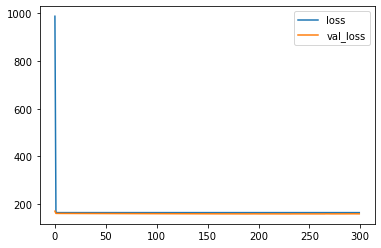

In [91]:
losses[['loss','val_loss']].plot()

In [92]:
X_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [93]:
prediction = model.predict(X_test)
prediction

array([[73.00603 ],
       [69.49442 ],
       [71.37985 ],
       ...,
       [72.49958 ],
       [72.673615],
       [72.933784]], dtype=float32)

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mean_absolute_error(y_test,prediction)

9.728763857135647

In [95]:
np.sqrt(mean_squared_error(y_test,prediction))

12.580312567457081

In [96]:
explained_variance_score(y_test,prediction)

0.011038434589217827

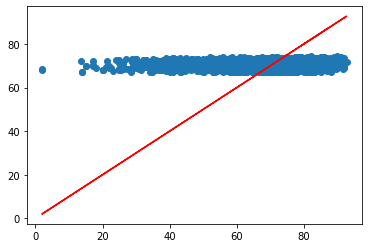

In [98]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,'r')